In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] =42
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

In [27]:
df_colors = pd.read_csv("colors.csv")
df_colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [28]:
df_parts = pd.read_csv("parts.csv")
df_parts.head()

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


In [29]:
df_partcat = pd.read_csv("part_categories.csv")
df_partcat.head()

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [30]:
df_sets = pd.read_csv("sets.csv")
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [31]:
df_themes = pd.read_csv("themes.csv")
df_themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [32]:
df_inv = pd.read_csv("inventories.csv")
df_inv.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [33]:
df_invparts = pd.read_csv("inventory_parts.csv")
df_invparts.head()

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f


In [34]:
df_invsets = pd.read_csv("inventory_sets.csv")
df_invsets.head()

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


## Storyline including the revenues of the company

In [35]:
df_sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [36]:
df_sets.shape

(11673, 5)

In [37]:
df_sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

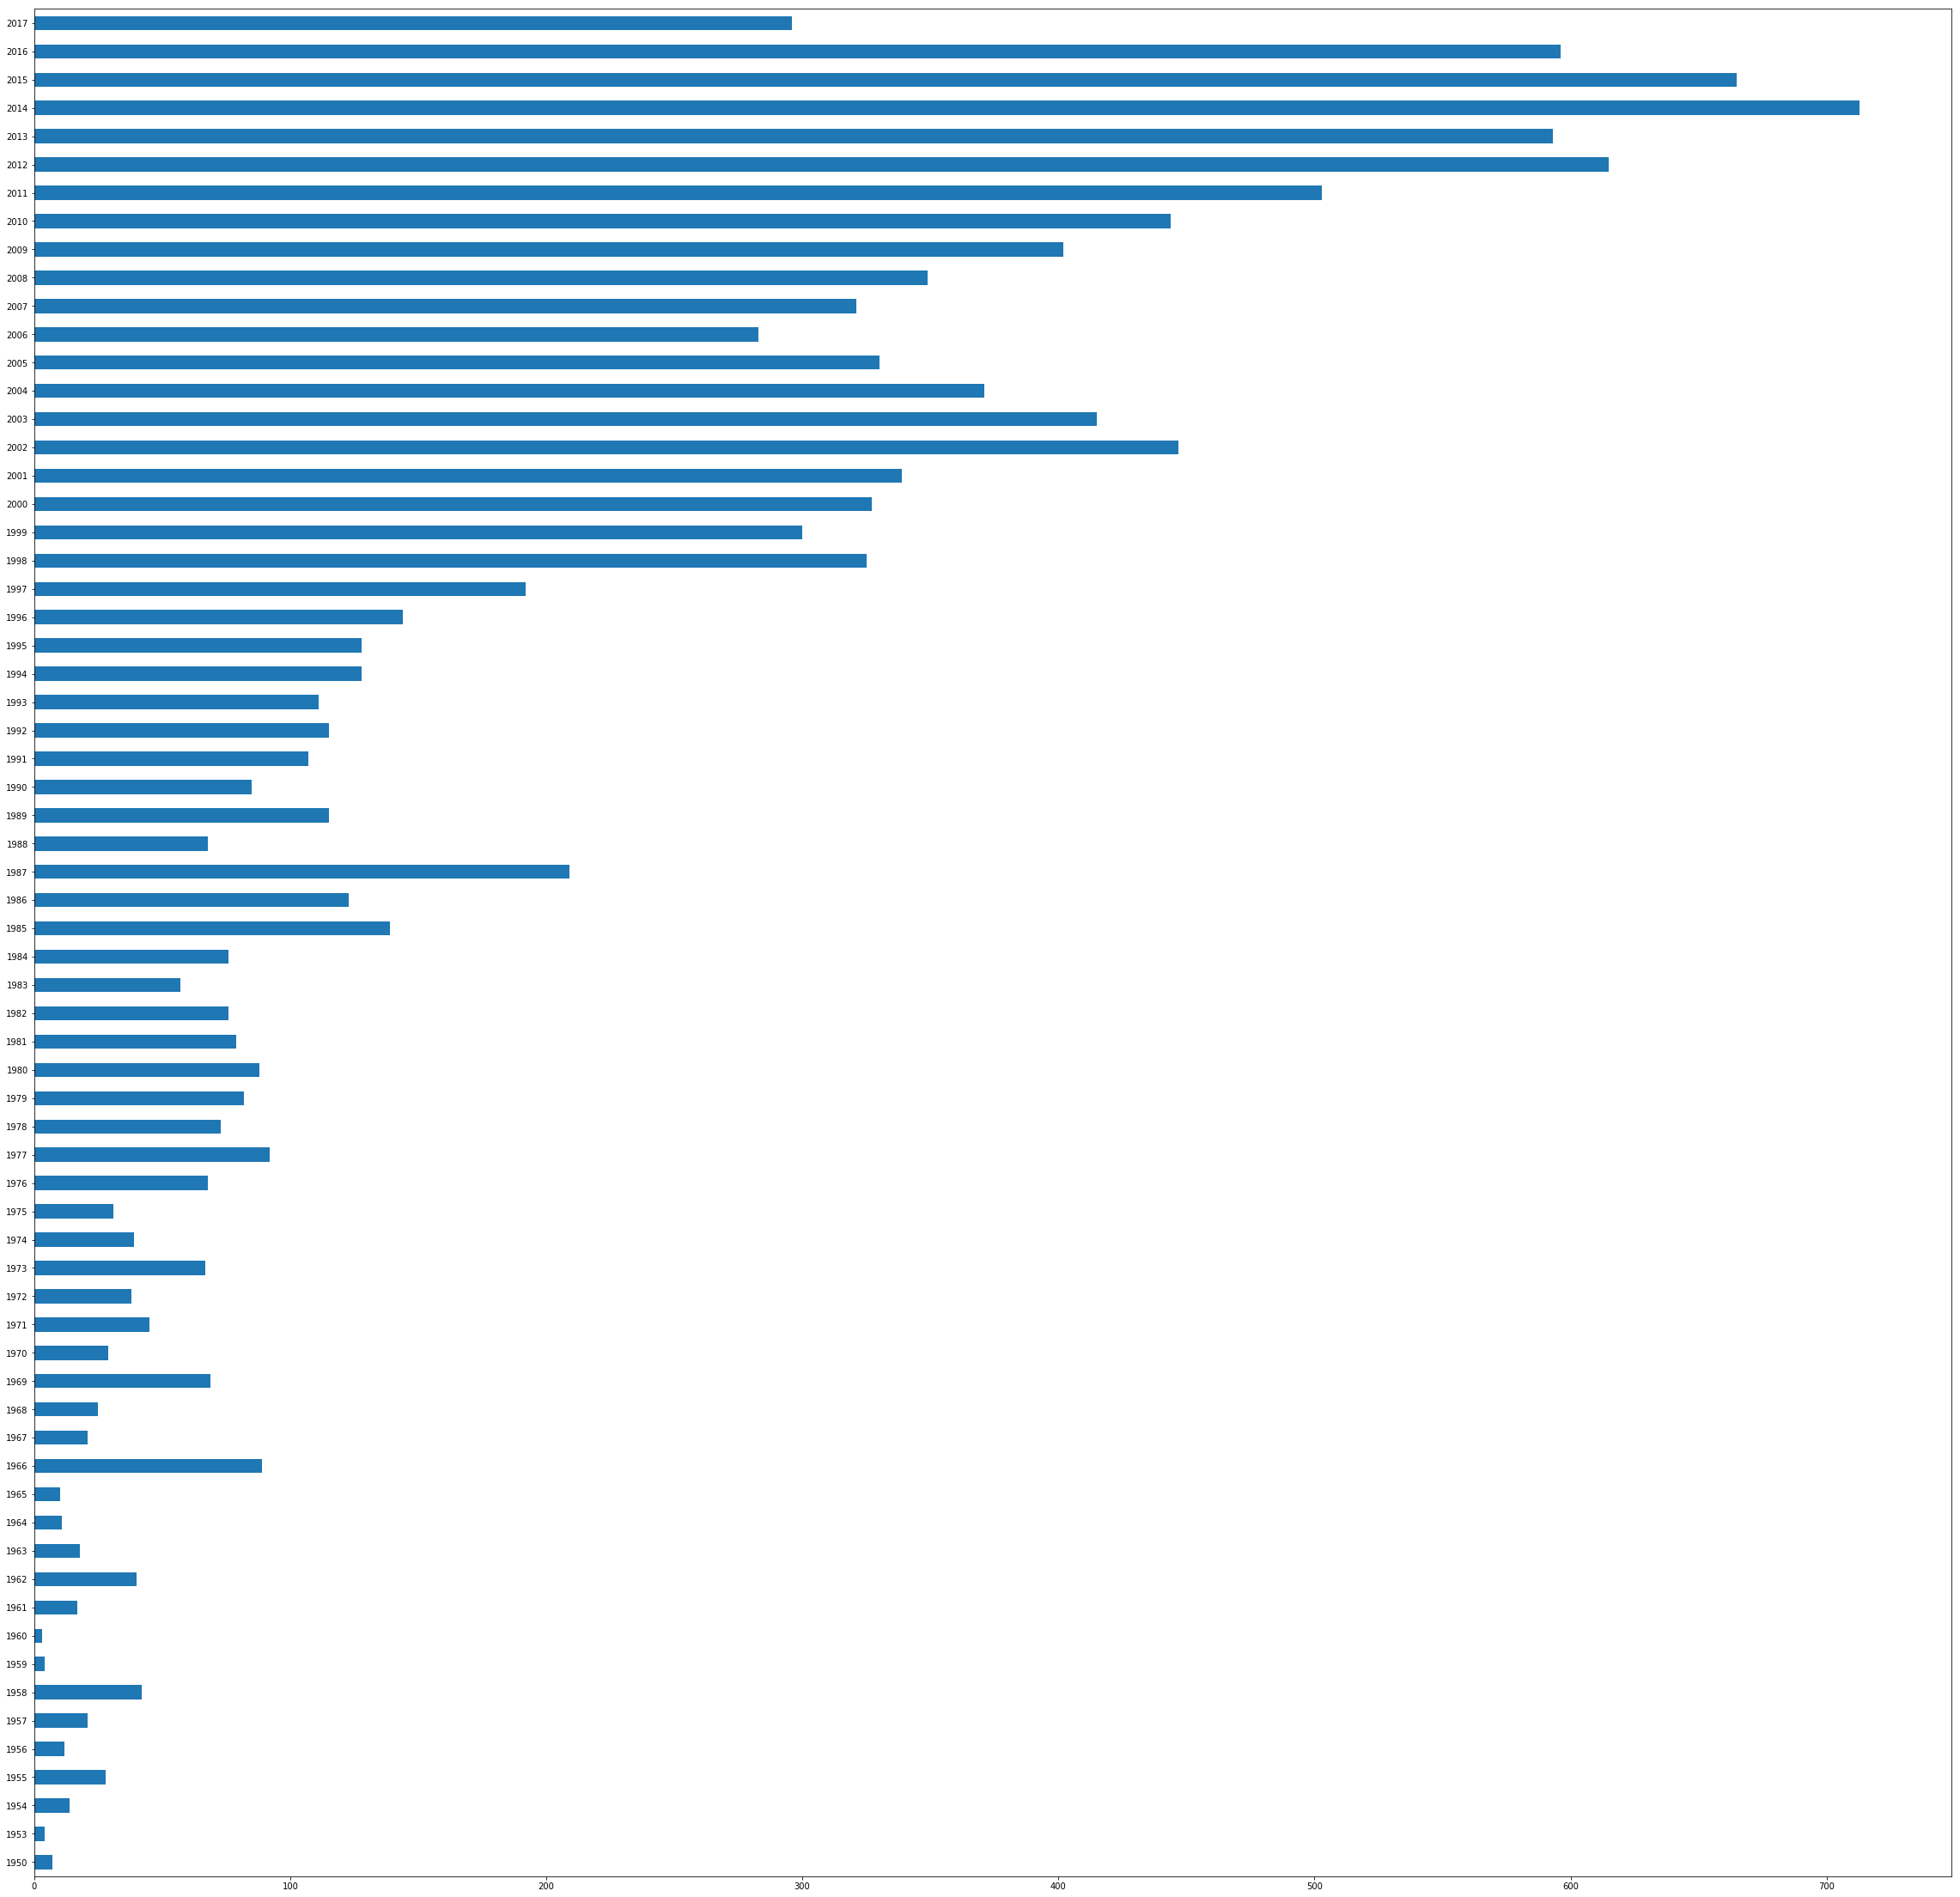

In [38]:
df_sets['year'].value_counts().sort_index().plot(kind='barh', figsize=(40,40))
plt.savefig("set_years.pdf")

In [39]:
df_fin = pd.read_excel("Lego_financials.xlsx")
df_fin.head()

,Year,Profit mDKK,Employees
0,1994,752,NaN
1,1995,431,8535.0
2,1996,470,8178.0
3,1997,62,8668.0
4,1998,-194,8670.0


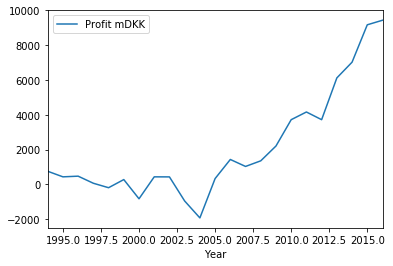

In [40]:
df_fin.plot(kind='line', x='Year', y='Profit mDKK')


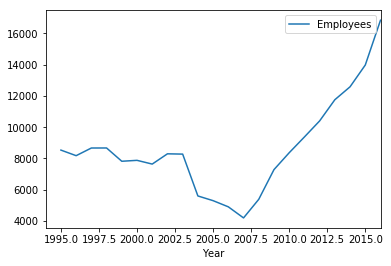

In [41]:
df_fin.plot(kind='line', x='Year', y='Employees')

In [42]:
df_sets_select = df_sets.loc[(df_sets['year'] > 1993) & (df_sets['year'] < 2017)]
df_sets_select.head()

,set_num,name,year,theme_id,num_parts
18,03093-1,The Race to Build It Board Game,1999,502,70
25,10000-1,Guarded Inn,2001,186,256
26,10001-1,Metroliner,2001,233,785
27,10002-1,Railroad Club Car,2001,233,272
28,10003-1,1 x 2 Sand Red Bricks,2001,254,100


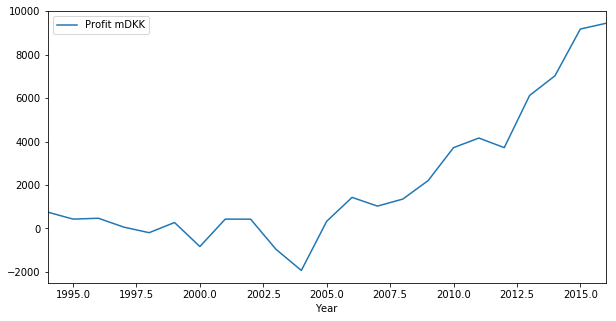

In [43]:
df_fin.plot(kind='line', x='Year', y='Profit mDKK', figsize=(10,5))
plt.savefig("profit.pdf")

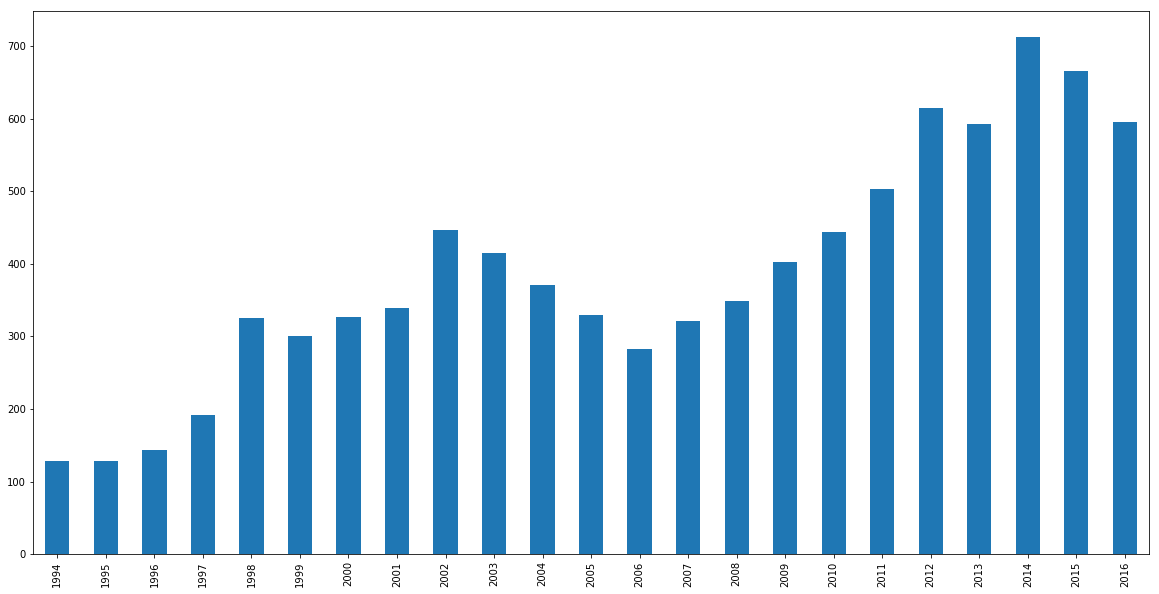

In [44]:
df_sets_select['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.savefig("sets.pdf")

In [45]:
#df_fin.plot(kind='line', x='Year', y='Employees', figsize=(20,10))

In [46]:
df_sets_2007 = df_sets.loc[df_sets['year'] == 2007]
len(df_sets_2007['name'])

321

In [47]:
df_sets_0304 = df_sets.loc[(df_sets['year'] > 2002) & (df_sets['year'] < 2005)]
len(df_sets_0304)

786

In [48]:
df_set_themes = df_sets_select.merge(df_themes, left_on='theme_id', right_on='id')
df_set_themes.head()

,set_num,name_x,year,theme_id,num_parts,id,name_y,parent_id
0,03093-1,The Race to Build It Board Game,1999,502,70,502,Game,501.0
1,2010-1,Happy Holidays - The Christmas Game,2010,502,139,502,Game,501.0
2,2856079-1,Creationary Booster Pack,2011,502,30,502,Game,501.0
3,30170-1,Ganrash,2012,502,56,502,Game,501.0
4,3835-1,Robo Champ,2009,502,119,502,Game,501.0


In [49]:
most_sets = df_set_themes.groupby('year')['name_y'].value_counts()
pd.options.display.max_rows = 999
most_sets.groupby(level=0).nlargest(3)

year  year  name_y            
1994  1994  Technic               30
            Recreation            11
            Basic Model            8
1995  1995  Freestyle             28
            Technic               19
            Launch Command         6
1996  1996  Supplemental          17
            Technic               12
            Airport                9
1997  1997  Basic Model           21
            UFO                   15
            Technic               14
1998  1998  Classic Basic         43
            Soccer                22
            Desert                21
1999  1999  Classic Basic         26
            Advent Sub-Set        24
            Space Port            22
2000  2000  Bulk Bricks           48
            RoboRiders            26
            Advent Sub-Set        24
2001  2001  Studios               44
            My Own Train          33
            Life On Mars          25
2002  2002  Technic               63
            Soccer                48
       

In [51]:
df_set_themes.groupby('name_y')['year'].value_counts()

name_y                         year
4 Juniors                      2003     1
9V                             1999     8
                               2002     5
                               1996     4
                               2006     4
                               1994     3
                               1995     2
                               1998     2
                               1997     1
                               2001     1
                               2003     1
                               2004     1
                               2005     1
Advent                         1999     1
                               2000     1
                               2016     1
Advent Sub-Set                 1999    24
                               2000    24
                               2001    24
                               2012    24
Adventurers                    1998     2
Agents                         2008     8
                               2009     